In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [16]:
%ls

 Volume in drive E is New Volume
 Volume Serial Number is EA03-E066

 Directory of e:\University\3rd Semester\AI ( LAB )\main

02-Dec-25  01:55 AM    <DIR>          .
02-Dec-25  01:49 AM    <DIR>          ..
02-Dec-25  02:06 AM           151,173 project.ipynb
06-Nov-25  04:01 AM        16,294,377 weatherHistory.csv
               2 File(s)     16,445,550 bytes
               2 Dir(s)  64,794,218,496 bytes free


In [17]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [18]:
df.tail()

print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

df.isnull().sum()

Rows: 96453
Columns: 12


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [19]:
df = df.fillna(df.mean(numeric_only=True))
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

df.dtypes


Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [20]:
df["Temperature (C)"] = df["Temperature (C)"].astype(np.int64)
df["Humidity"] = df["Humidity"].astype(np.int64)
df["Wind Speed (km/h)"] = df["Wind Speed (km/h)"].astype(np.int64)
df["Loud Cover"] = df["Loud Cover"].astype(np.int64)
df["Pressure (millibars)"] = df["Pressure (millibars)"].astype(np.int64)


In [21]:
x = df[["Temperature (C)", "Humidity", "Wind Speed (km/h)", "Loud Cover", "Pressure (millibars)"]]
y = df["Precip Type"]

cat_cols = x.select_dtypes(["object"]).columns
x[cat_cols] = x[cat_cols].apply(lambda col: pd.factorize(col)[0])

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, shuffle=False)


In [22]:
results = {}

scaler = MinMaxScaler()
X_train_m = scaler.fit_transform(X_train)
X_test_m = scaler.transform(X_test)

multinomial = MultinomialNB()
multinomial.fit(X_train_m, Y_train)
pred_m = multinomial.predict(X_test_m)

results["MultinomialNB"] = {
    "Accuracy": accuracy_score(Y_test, pred_m),
    "Precision": precision_score(Y_test, pred_m, average='weighted'),
    "Recall": recall_score(Y_test, pred_m, average='weighted'),
    "F1": f1_score(Y_test, pred_m, average='weighted')
}

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
models = {
    "BernoulliNB": BernoulliNB(),
    "GaussianNB": GaussianNB(),
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoost": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(Y_test, predictions),
        "Precision": precision_score(Y_test, predictions, average='weighted', zero_division=0),
        "Recall": recall_score(Y_test, predictions, average='weighted'),
        "F1": f1_score(Y_test, predictions, average='weighted')
    }

In [24]:
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1
MultinomialNB,0.936204,0.876478,0.936204,0.905357
BernoulliNB,0.979748,0.984628,0.979748,0.981025
GaussianNB,0.953276,0.955493,0.953276,0.954284
RandomForest,0.981165,0.981879,0.981165,0.981456
DecisionTree,0.981131,0.981464,0.981131,0.981280
KNN,0.979956,0.980593,0.979956,0.980225
SVM,0.949233,0.951299,0.949233,0.933277
AdaBoost,0.979748,0.984628,0.979748,0.981025
GradientBoost,0.979818,0.983782,0.979818,0.980927


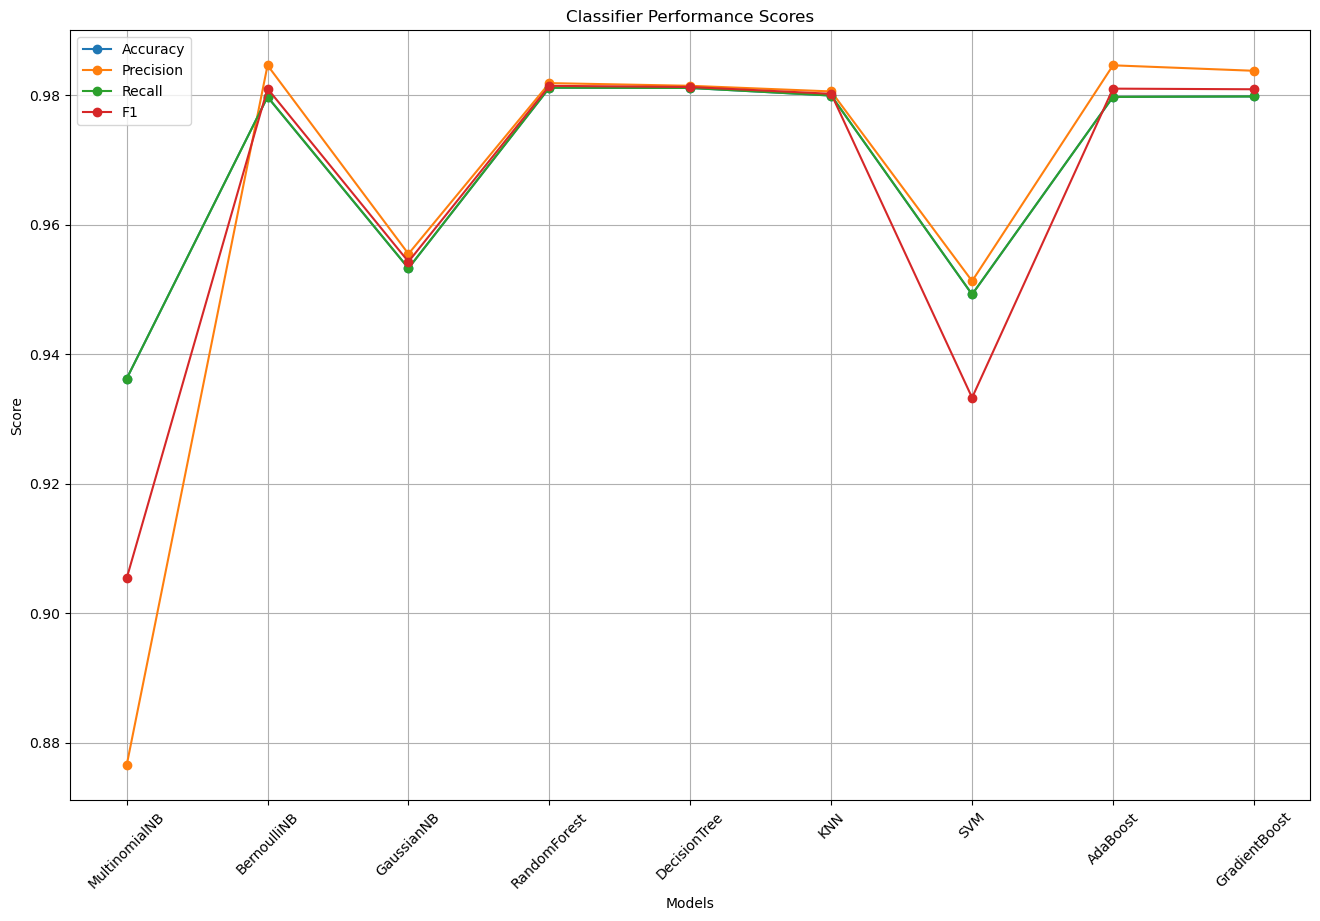

In [29]:
plt.figure(figsize=(16, 10))

for metric in ["Accuracy", "Precision", "Recall", "F1"]:
    plt.plot(results_df.index, results_df[metric], marker="o", label=metric)

plt.title("Classifier Performance Scores")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


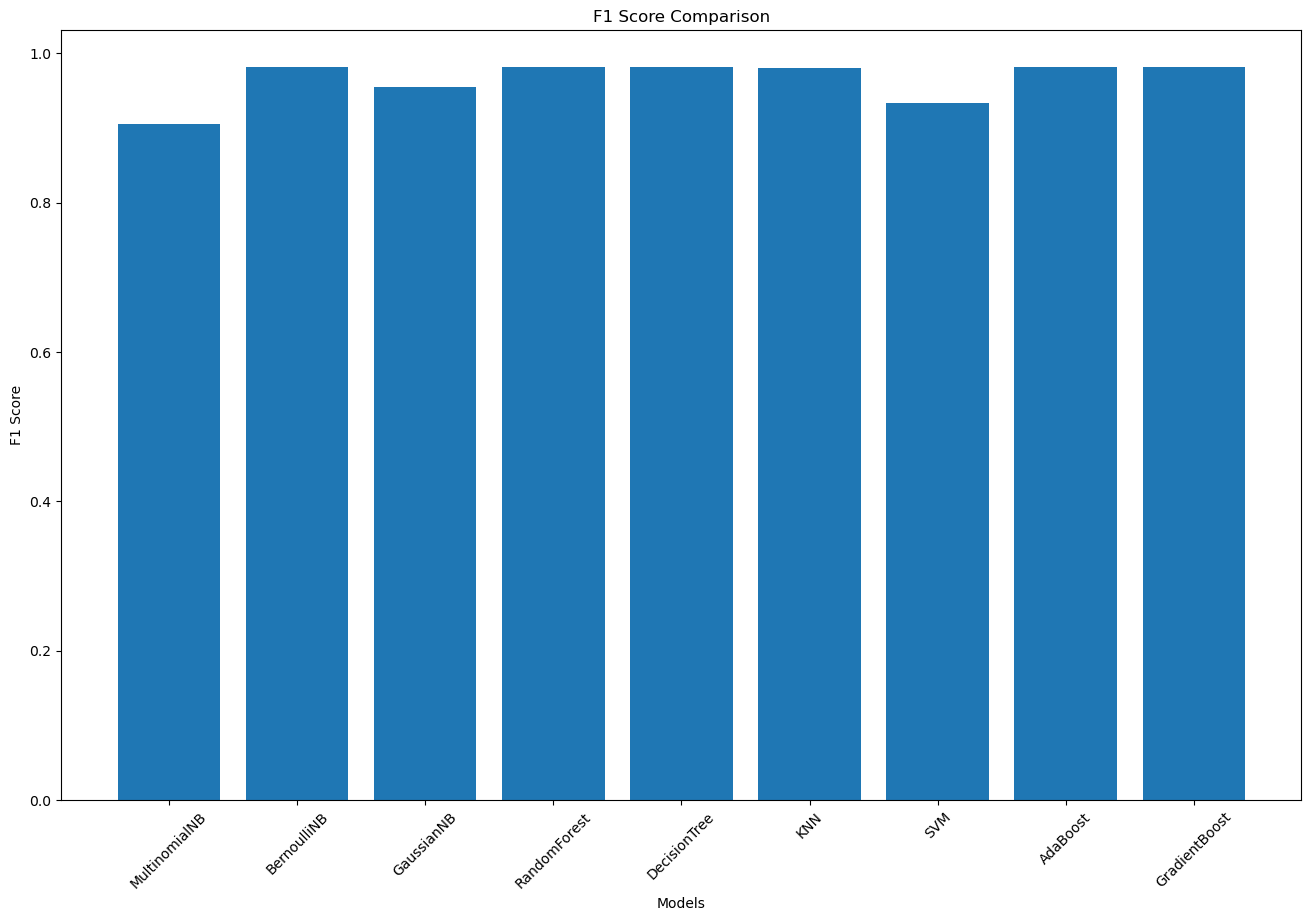

In [30]:
plt.figure(figsize=(16, 10))
plt.bar(results_df.index, results_df["F1"])
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison")
plt.xticks(rotation=45)
plt.show()


In [32]:
best_rf = RandomForestClassifier()
best_rf.fit(X_train, Y_train)

best_dt = DecisionTreeClassifier()
best_dt.fit(X_train, Y_train)


DecisionTreeClassifier()

In [33]:
import pickle
best_model = RandomForestClassifier()
best_model.fit(X_train, Y_train)
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Best Model (Random Forest) saved successfully!")


Best Model (Random Forest) saved successfully!
